In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('03_05/gapminder.csv')

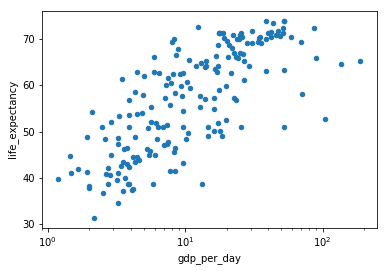

In [13]:
def plotyear(year):
    data = gapminder[gapminder.year == year]    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True)
plotyear(1965)

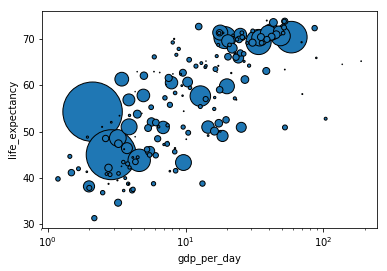

In [9]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area, linewidths=1, edgecolors='k')
    
plotyear(1965)

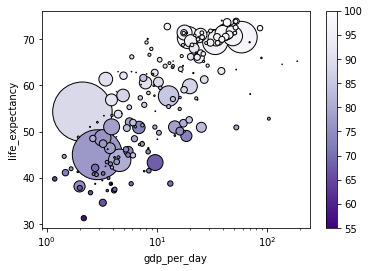

In [18]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area,  c=color, colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100, linewidths=1, edgecolors='k', sharex=False)
    
plotyear(1965)

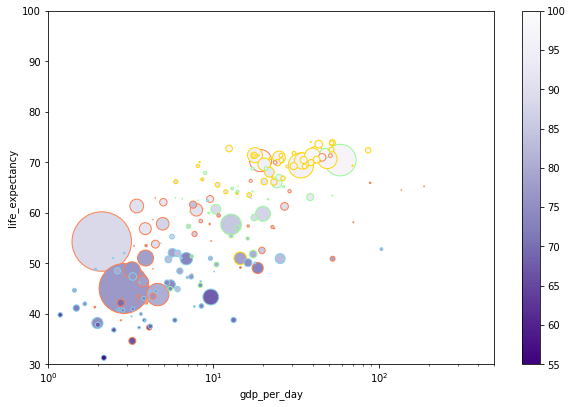

In [22]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area,  c=color, colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100, linewidths=1, edgecolors=edgecolor, sharex=False, figsize=(10,6.5))
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
plotyear(1965)

In [23]:
interact(plotyear, year=range(1965, 2016, 10))

A Jupyter Widget

<function __main__.plotyear>

In [24]:
# Income, Life expectancy and Child Mortality. 

In [28]:
    gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [29]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

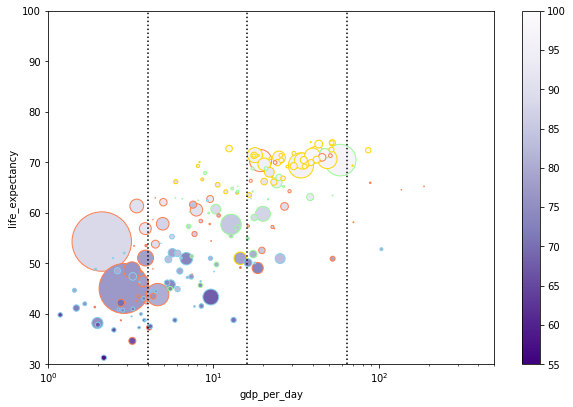

In [37]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area,  c=color, colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100, linewidths=1, edgecolors=edgecolor, sharex=False, figsize=(10,6.5))
    
    for level in [4,16,64]:
        pp.axvline(level, linestyle=':',color='k')
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
plotyear(1965)

In [38]:
# Level 1 less than $4 

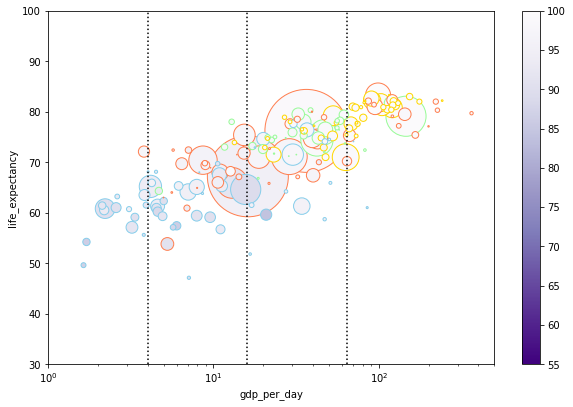

In [40]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area,  c=color, colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100, linewidths=1, edgecolors=edgecolor, sharex=False, figsize=(10,6.5))
    
    for level in [4,16,64]:
        pp.axvline(level, linestyle=':',color='k')
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
plotyear(2015)

In [42]:
# We see by 2015 most of the world has risen out of extreme poverty

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a190d56a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a19596d68>]], dtype=object)

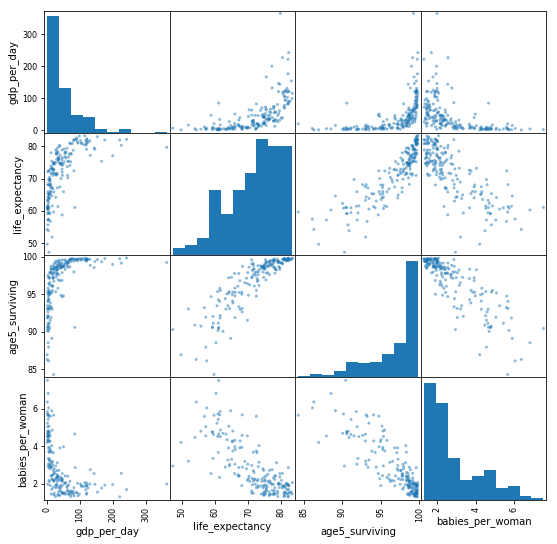

In [48]:
data = gapminder.loc[gapminder.year == 2015,['gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]
pandas.plotting.scatter_matrix(data, figsize=(9,9))

In [49]:
# 1 dimensional and 2 dimensional paired distributions of the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1936a550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1814fc88>]], dtype=object)

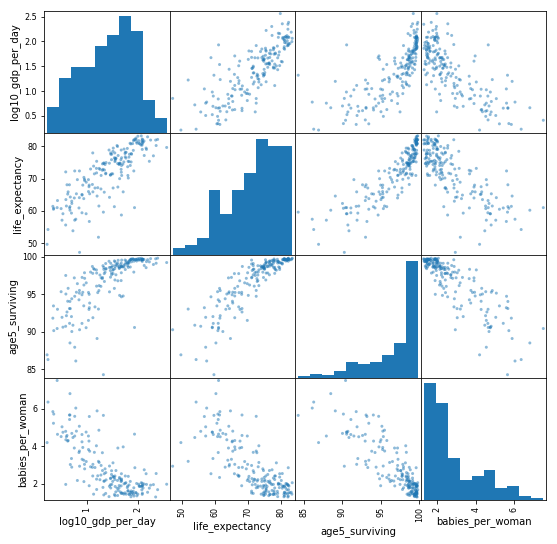

In [50]:
gapminder['log10_gdp_per_day'] = np.log10(data['gdp_per_day'])

data = gapminder.loc[gapminder.year == 2015,['log10_gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]
pandas.plotting.scatter_matrix(data, figsize=(9,9))

In [51]:
# Now we can see clear trends between all variables